In [1]:
#Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cardio_base_df=pd.read_csv('d:\Data\Turing\cardio_base.csv')
cardio_alco_df=pd.read_csv('d:\Data\Turing\cardio_alco.csv')

In [3]:
cardio_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


<Axes: xlabel='weight', ylabel='Count'>

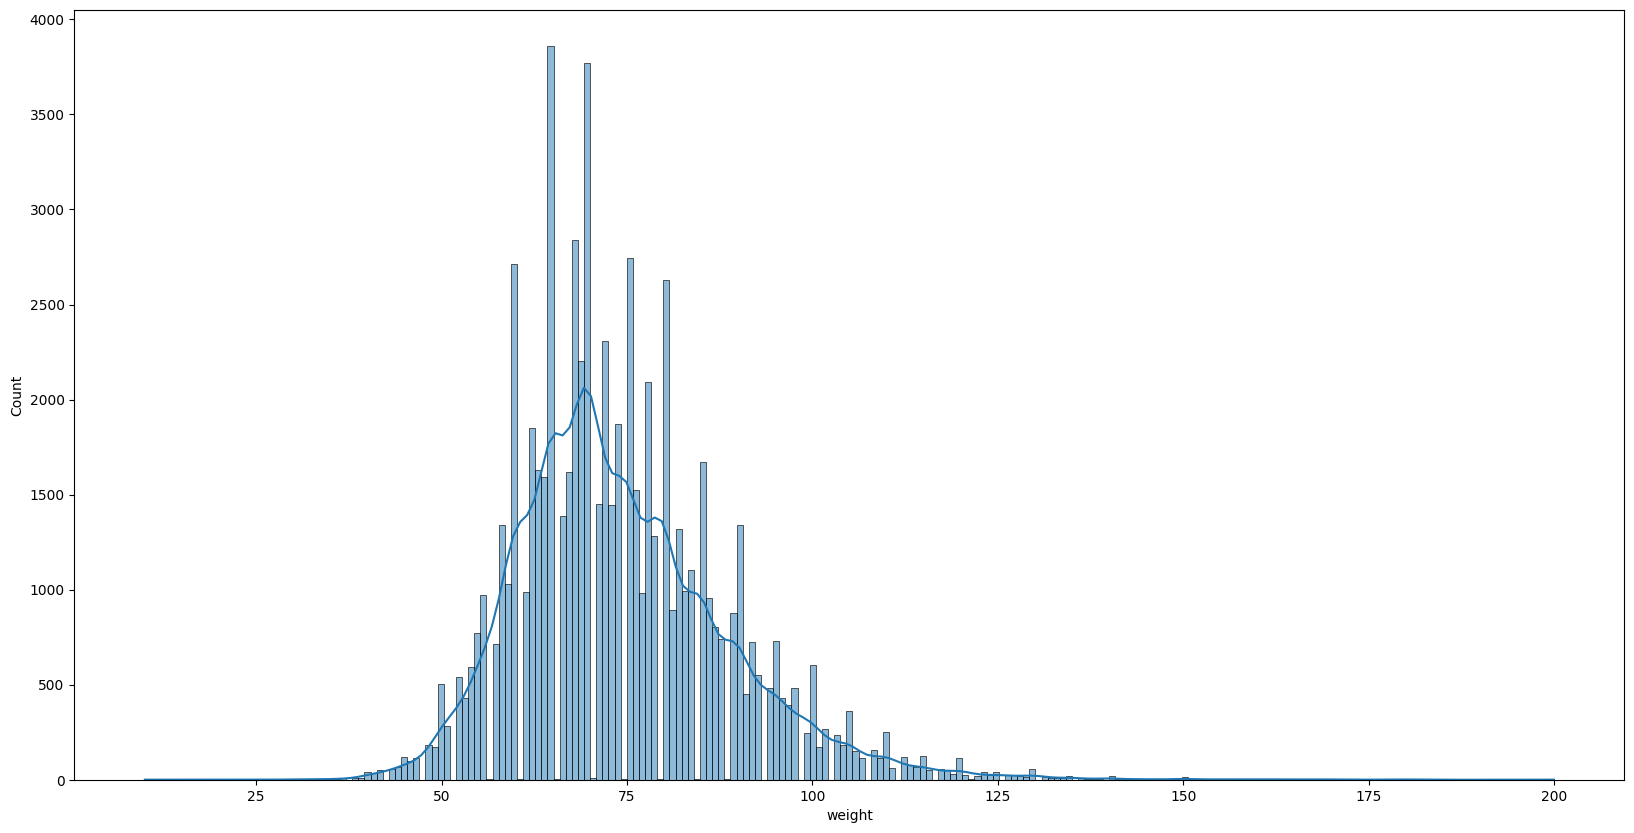

In [5]:
plt.figure(figsize=(20,10))
sns.histplot(cardio_base_df.weight, kde=True)

In [4]:
cardio_base_df['age']=(cardio_base_df['age']/365).astype('int')

In [5]:
avrg_weight_by_age=cardio_base_df.groupby('age')['weight'].mean()#agg({'weight':'mean'})

In [6]:
avrg_weight_by_age

age
29    70.000000
30    59.000000
39    72.291573
40    70.914920
41    72.895849
42    71.681523
43    73.983161
44    72.731044
45    74.369430
46    72.717292
47    74.695753
48    74.163059
49    73.929353
50    73.065081
51    75.098530
52    73.432174
53    74.641262
54    73.982996
55    75.266728
56    74.268755
57    75.122789
58    74.619009
59    75.355207
60    74.004312
61    75.707111
62    74.047713
63    75.873721
64    74.619113
Name: weight, dtype: float64

In [17]:
avrg_weight_by_age.max()/avrg_weight_by_age.min()-1

0.2859952671226089

In [23]:
cardio_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1
69996,99995,61,1,158,126.0,140,90,2,0
69997,99996,52,2,183,105.0,180,90,3,0
69998,99998,61,1,163,72.0,135,80,1,0


How much heavier the age group with the highest average weight than the age group with the lowest weight?

In [31]:
avg_wght_age=cardio_base_df.groupby('age')['weight'].mean()
#highest_avrg_weight=cardio_base_df['weight'].max()
#lowest_weight=cardio_base_df['weight'].min()

In [39]:
avg_wght_age.max()/avg_wght_age.min()-1;
round(avg_wght_age.max()-avg_wght_age.min()-1, 2)

15.87

Do people over 50 have higher cholesterol levels than the rest?

In [116]:
age_50=cardio_base_df[cardio_base_df['age']>=50].groupby('age')['cholesterol'].mean()
age_lower_50=cardio_base_df[cardio_base_df['age']<50].groupby('age')['cholesterol'].mean()
#above=age_50.groupby('age')['cholesterol'].mean()
#below=age_lower_50.groupby('age')['cholesterol'].mean()

In [67]:
above.mean()/below.mean()

1.192326742513159

In [72]:
age_50.cholesterol.mean(), age_lower_50.cholesterol.mean()

(1.4213743285793665, 1.243168760801532)

In [63]:
cholestrol[cholestrol.index>50].mean()/cholestrol[cholestrol.index<50].mean()-1

0.20107321616632

Are men more likely to be a smoker than women?

In [119]:
cardio_base_df.groupby('gender')['smoke'].sum()

gender
1     813
2    5356
Name: smoke, dtype: int64

In [129]:
smoke=cardio_base_df.query("smoke==1")

In [133]:
gender=cardio_base_df[cardio_base_df['smoke']==1].gender

(array([ 813.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5356.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

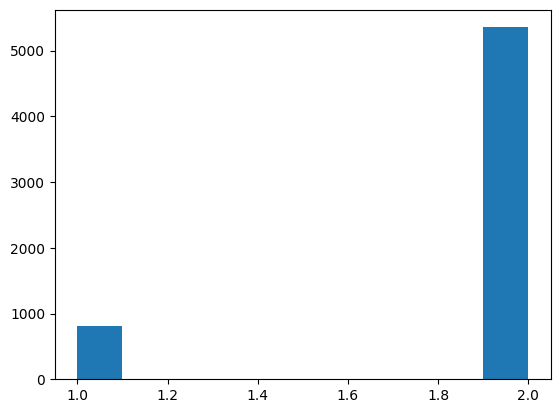

In [136]:
plt.hist(gender)

In [130]:
smoke.gender.value_counts()

gender
2    5356
1     813
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

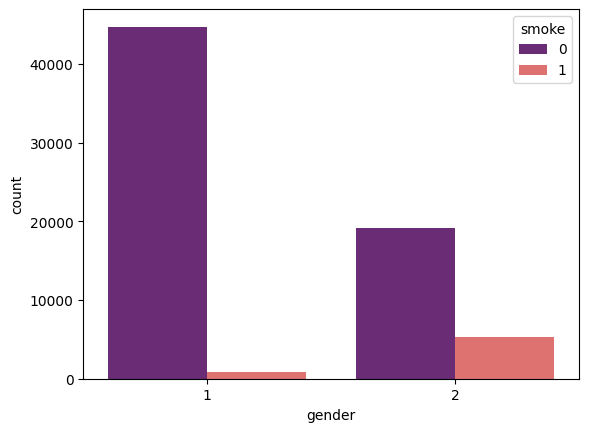

In [87]:
sns.countplot(data=cardio_base_df, x='gender',hue='smoke', palette='magma')

In [56]:
gender=cardio_base_df.groupby(by='gender')['smoke'].sum()#agg({'smoke':'sum'})

In [57]:
gender

gender
1     813
2    5356
Name: smoke, dtype: int64

In [61]:
gender[2]/gender[1]

6.587945879458794

In [47]:
gender[gender.index==2]['smoke'].item()/gender[gender.index==1]['smoke'].item()

6.587945879458794

How tall are the tallest 1% of people

In [75]:
cardio_base_df.quantile(0.99)

id             98974.05
age               64.00
gender             2.00
height           184.00
weight           117.00
ap_hi            180.00
ap_lo           1000.00
cholesterol        3.00
smoke              1.00
Name: 0.99, dtype: float64

Which two features have the highest spearman rank correlation?

In [82]:
cor=cardio_base_df.corr(method='spearman')

<Axes: >

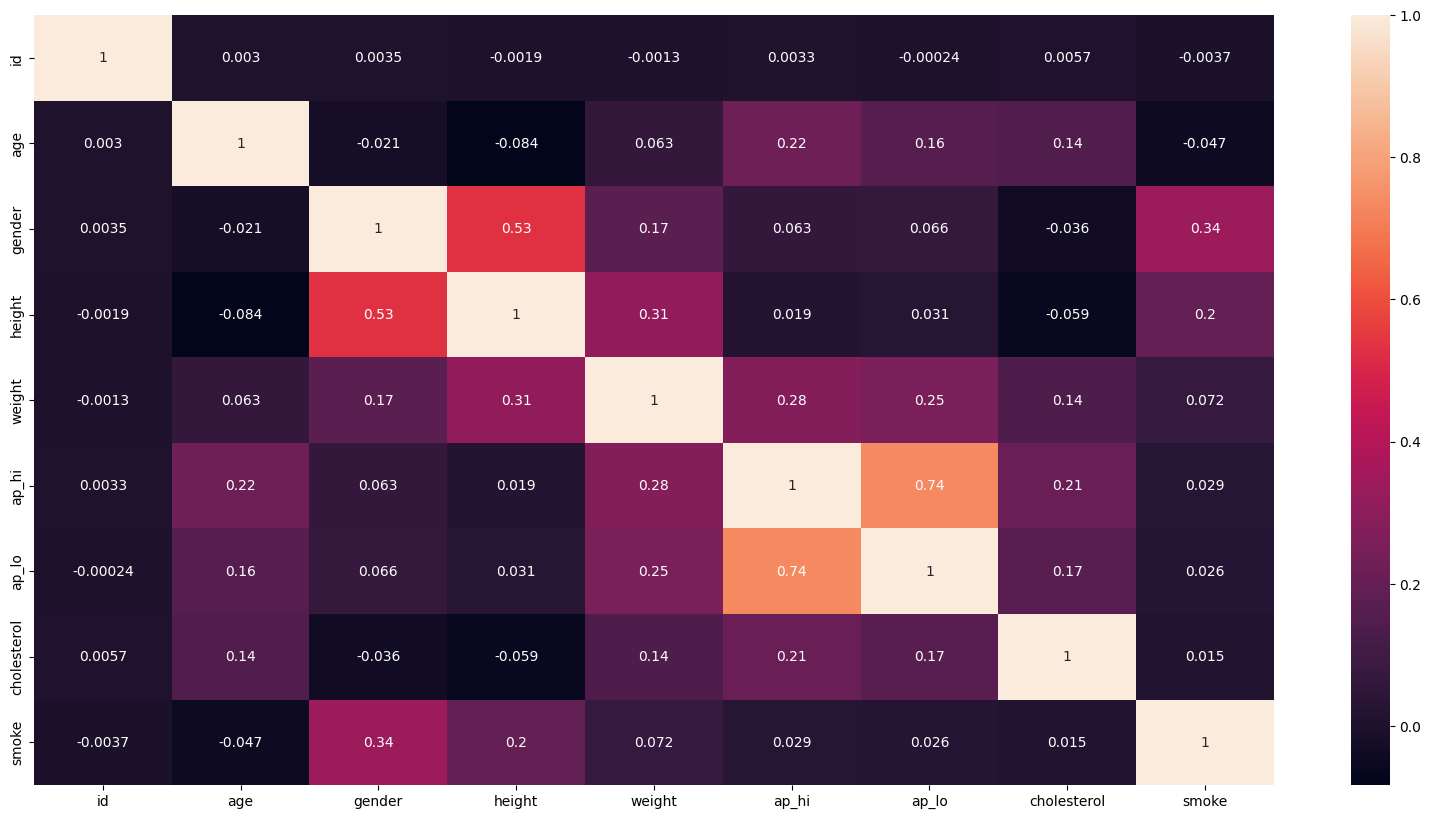

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(data=cor, annot=True)

Which two features have the highest spearman rank correlation?

What percentage of people are more than 2 standard deviations far from the average height?

In [142]:
avg=cardio_base_df.height.mean()
std=cardio_base_df.height.std()

In [174]:
len(cardio_base_df[abs(cardio_base_df['height']-avg)>2*std]), len(cardio_base_df[cardio_base_df.height])

2335

In [88]:
mean_height=cardio_base_df.height.mean()
std_dev_height=cardio_base_df.height.std()

In [102]:
len(cardio_base_df[abs(cardio_base_df.height-mean_height)>2*std_dev_height])/len(cardio_base_df.height)

0.033357142857142856

What percentage of the population over 50 years old consume alcohol?
Ignore those persons, where we have no alcohol sonsumption information!

In [185]:
cardio_alco_df

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [187]:
df_full=pd.merge(cardio_base_df, cardio_alco_df, on='id')

In [221]:
alco_consumers=df_full[df_full['age']>50]

In [222]:
len(alco_consumers[alco_consumers.alco==1])/len(alco_consumers.age)

0.049086076910560286

In [211]:
cardio_base_df[cardio_base_df.age>=50]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
5,8,60,1,151,67.0,120,80,2,0
6,9,60,1,157,93.0,130,80,3,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1
69996,99995,61,1,158,126.0,140,90,2,0
69997,99996,52,2,183,105.0,180,90,3,0
69998,99998,61,1,163,72.0,135,80,1,0


In [ ]:
alco_consumers[alco_consumers['age']]

In [5]:
cardio_alco_df=pd.read_csv('d:\Data\Turing\cardio_alco.csv', delimiter=';')

In [125]:
cardio_alco_df[cardio_alco_df['alco']==1]

,id,alco
30,81,1
67,134,1
69,136,1
75,142,1
102,180,1
...,...,...
56845,99858,1
56851,99864,1
56861,99882,1
56886,99933,1


In [6]:
df_full=pd.merge(cardio_alco_df, cardio_base_df, on='id')

In [7]:
df_full[df_full['alco']==1]

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
30,81,1,20330,2,187,115.0,130,90,1,0
67,134,1,17363,1,167,71.0,120,80,2,0
69,136,1,18718,1,167,80.0,190,90,2,0
75,142,1,14499,2,164,48.0,110,70,1,1
102,180,1,21473,2,174,90.0,140,80,1,1
...,...,...,...,...,...,...,...,...,...,...
56845,99858,1,19475,2,171,65.0,120,80,1,1
56851,99864,1,21883,2,178,102.0,150,100,1,0
56861,99882,1,23281,1,164,98.0,140,90,2,0
56886,99933,1,19137,2,167,74.0,130,80,1,1


In [111]:
df_full

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,44,0,40,1,159,60.0,110,70,1,0
1,45,0,56,1,160,73.0,130,85,1,0
2,46,0,60,2,173,82.0,140,90,3,0
3,47,0,55,1,163,55.0,120,80,1,0
4,49,0,50,2,175,95.0,120,80,1,0
...,...,...,...,...,...,...,...,...,...,...
56898,99949,0,57,1,178,69.0,130,90,1,0
56899,99950,0,53,2,155,76.0,130,90,1,0
56900,99951,0,61,2,170,72.0,120,80,1,0
56901,99952,0,42,2,165,66.0,120,80,1,0


In [128]:
age50=df_full[df_full['age']>=50]

In [129]:
len(cardio_base_df), len(age50)

(70000, 39514)

<Axes: xlabel='alco', ylabel='count'>

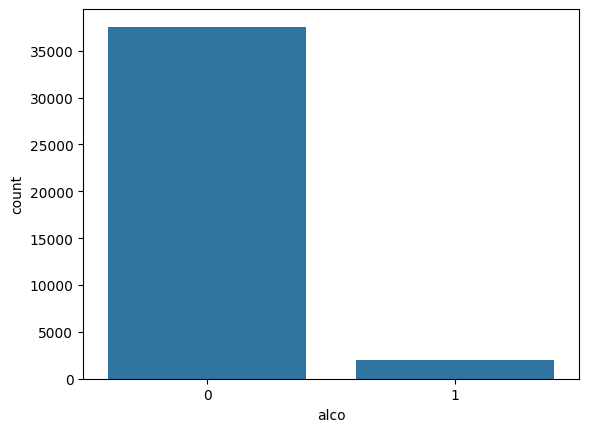

In [130]:
sns.countplot(data=age50,x='alco')

In [132]:
len(age50[age50['alco']==1])/len(age50)

0.04952675001265374

In [147]:
smokers=age50['alco']

In [158]:
smokers.value_counts()[1]/len(smokers)

0.04952675001265374

Which of the following statements is true with 95% confidence?
- Smokers have higher blood presure than non-smokers
- Smokers have higher cholesterol level than non-smokers
- Smokers weight less than non smokers
- Men have higher blood pressure than women

In [9]:
df_full['mn_ap']=(df_full['ap_hi']+df_full['ap_lo'])/2

In [41]:
df_full

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,mn_ap,mean
0,44,0,14605,1,159,60.0,110,70,1,0,90.0,90.0
1,45,0,20652,1,160,73.0,130,85,1,0,107.5,107.5
2,46,0,21940,2,173,82.0,140,90,3,0,115.0,115.0
3,47,0,20404,1,163,55.0,120,80,1,0,100.0,100.0
4,49,0,18328,2,175,95.0,120,80,1,0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56898,99949,0,21151,1,178,69.0,130,90,1,0,110.0,110.0
56899,99950,0,19538,2,155,76.0,130,90,1,0,110.0,110.0
56900,99951,0,22491,2,170,72.0,120,80,1,0,100.0,100.0
56901,99952,0,15450,2,165,66.0,120,80,1,0,100.0,100.0


In [40]:
df_full['mean']=(df_full.ap_hi+df_full.ap_lo)/2

In [46]:
confidence=0.95
mean_by_smoke=df_full.groupby(by='smoke')['mn_ap'].agg(['mean', 'sem'])
mean_by_smoke['95hi']=mean_by_smoke['mean']+(1+confidence)* mean_by_smoke['sem']
mean_by_smoke['95lo']=mean_by_smoke['mean']-(1+confidence)*mean_by_smoke['sem']

In [47]:
mean_by_smoke

,mean,sem,95hi,95lo
smoke,,,,
0,112.851959,0.562122,113.948097,111.755821
1,113.139016,1.241633,115.560200,110.717831


In [48]:

smokers_cholesterol=df_full[df_full['smoke']==1]


<Axes: xlabel='smoke', ylabel='count'>

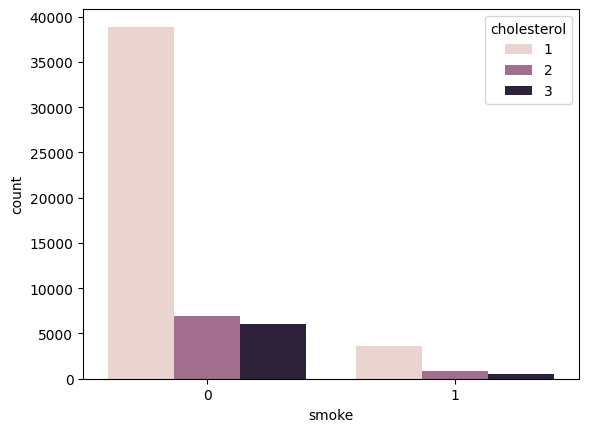

In [64]:
sns.countplot(data=df_full, x='smoke', hue='cholesterol')

In [59]:
df_smokers=df_full.groupby('smoke')['cholesterol'].agg(['mean', 'sem'])
df_smokers['chol_hi']=df_smokers['mean'] + (1+confidence)*df_smokers['sem']
df_smokers['chol_lo']=df_smokers['mean'] - (1+confidence)*df_smokers['sem']

In [60]:
df_smokers

,mean,sem,chol_hi,chol_lo
smoke,,,,
0,1.365668,0.002989,1.371496,1.359839
1,1.390554,0.009616,1.409305,1.371803


In [66]:
(df_smokers['chol_hi']-df_smokers['chol_lo'])/df_smokers['mean']*100

smoke
0    0.853563
1    2.696921
dtype: float64

<Axes: ylabel='weight'>

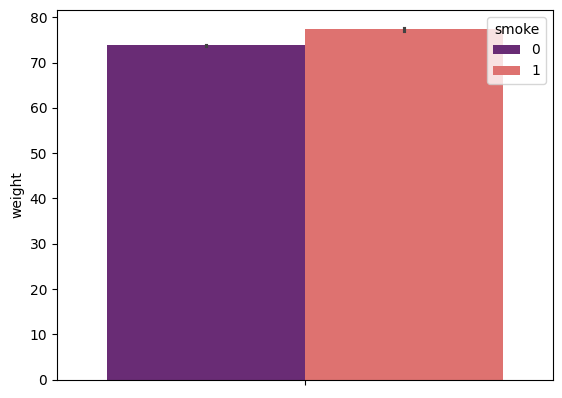

In [68]:
sns.barplot(data=df_full, y='weight',hue='smoke', palette='magma')

<Axes: xlabel='cholesterol'>

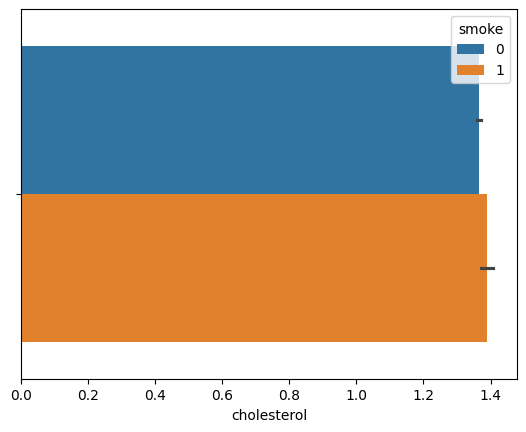

In [170]:
sns.barplot(data=df_full, x='cholesterol', hue='smoke')

# Second Dataset, Covid19 cases

In [3]:
from pandas import to_datetime
import pandas as pd

In [147]:
covid_dataset=pd.read_csv('d:\Data\Turing\covid_data.csv')

In [61]:
covid_dataset

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [62]:
covid_dataset['date']=pd.to_datetime(covid_dataset['date'])

When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?

In [63]:
Italy_df=covid_dataset[covid_dataset['location']=='Italy']
Germany_df=covid_dataset[covid_dataset['location']=='Germany']

In [ ]:
Italy_df['cumsumI']=Italy_df['new_cases'].cumsum()
Germany_df['cumsumG']=Germany_df['new_cases'].cumsum()

In [65]:
Italy_Germany_df=pd.merge(Italy_df, Germany_df, on='date')

In [66]:
Italy_Germany_df

,location_x,date,new_cases_x,new_deaths_x,population_x,aged_65_older_percent_x,gdp_per_capita_x,hospital_beds_per_thousand_x,cumsumI,location_y,new_cases_y,new_deaths_y,population_y,aged_65_older_percent_y,gdp_per_capita_y,hospital_beds_per_thousand_y,cumsumG
0,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,0,Germany,0,0,83783945.0,21.453,45229.245,8.0,0
1,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,0,Germany,0,0,83783945.0,21.453,45229.245,8.0,0
2,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,0,Germany,0,0,83783945.0,21.453,45229.245,8.0,0
3,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,0,Germany,0,0,83783945.0,21.453,45229.245,8.0,0
4,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,0,Germany,0,0,83783945.0,21.453,45229.245,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Italy,2020-06-06,518,85,60461828.0,23.021,35220.084,3.18,234531,Germany,407,33,83783945.0,21.453,45229.245,8.0,183678
159,Italy,2020-06-07,270,72,60461828.0,23.021,35220.084,3.18,234801,Germany,301,22,83783945.0,21.453,45229.245,8.0,183979
160,Italy,2020-06-08,197,53,60461828.0,23.021,35220.084,3.18,234998,Germany,214,6,83783945.0,21.453,45229.245,8.0,184193
161,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18,235278,Germany,350,37,83783945.0,21.453,45229.245,8.0,184543


In [67]:
Italy_Germany_df[(Italy_Germany_df['cumsumI']-Italy_Germany_df['cumsumG'])>10000]['date'].min()

Timestamp('2020-03-12 00:00:00')

Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss.
What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

In [68]:
Italy_df=Italy_df[(Italy_df.date>="2020-02-28") & (Italy_df.date<="2020-03-20")]

(array([18321., 18322., 18326., 18330., 18334., 18338., 18342.]),
 [Text(18321.0, 0, '2020-02-29'),
  Text(18322.0, 0, '2020-03-01'),
  Text(18326.0, 0, '2020-03-05'),
  Text(18330.0, 0, '2020-03-09'),
  Text(18334.0, 0, '2020-03-13'),
  Text(18338.0, 0, '2020-03-17'),
  Text(18342.0, 0, '2020-03-21')])

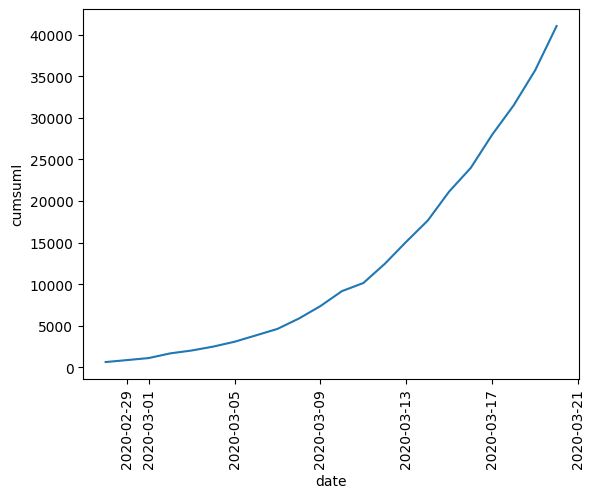

In [71]:
sns.lineplot(data=Italy_df, x='date', y='cumsumI')
plt.xticks(rotation=90)

In [87]:
Italy_df['ts']=Italy_df['date'].astype('int64')//10**9
Italy_df['ts']-=Italy_df['ts'].min()
x=Italy_df['ts']
y=Italy_df['cumsumI']
p= np.polyfit(x, np.log(y), 1)
a= np.exp(p[1])
b=p[0]
y_fitted=a*np.exp(b*x)

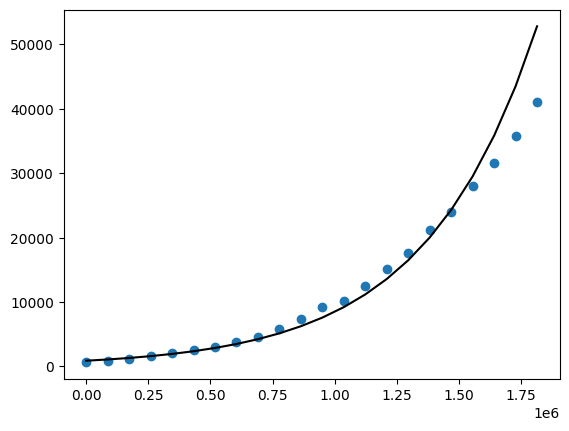

In [89]:
ax=plt.axes()
ax.scatter(x, y, label='Raw Data')
ax.plot(x, y_fitted, 'k',label='Fitted curve')
plt.show()

In [110]:
Italy_df_2020_3_20=Italy_df[Italy_df['date']=='2020-03-20']
Italy_df_2020_3_20

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsumI,ts
10768,Italy,2020-03-20,5322,429,60461828.0,23.021,35220.084,3.18,41035,1814400


In [115]:
x_test=Italy_df_2020_3_20['ts'].item()
y_test=Italy_df_2020_3_20['cumsumI'].item()
y_pred=a*np.exp(b*x_test)

In [121]:
Italy_df['y_pred']=a*np.exp(b*Italy_df.ts)

In [122]:
Italy_df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,cumsumI,ts,y_pred
10747,Italy,2020-02-28,250,5,60461828.0,23.021,35220.084,3.18,650,0,898.210903
10748,Italy,2020-02-29,238,4,60461828.0,23.021,35220.084,3.18,888,86400,1090.498866
10749,Italy,2020-03-01,240,8,60461828.0,23.021,35220.084,3.18,1128,172800,1323.951616
10750,Italy,2020-03-02,561,6,60461828.0,23.021,35220.084,3.18,1689,259200,1607.381664
10751,Italy,2020-03-03,347,17,60461828.0,23.021,35220.084,3.18,2036,345600,1951.488092
10752,Italy,2020-03-04,466,28,60461828.0,23.021,35220.084,3.18,2502,432000,2369.260431
10753,Italy,2020-03-05,587,27,60461828.0,23.021,35220.084,3.18,3089,518400,2876.468995
10754,Italy,2020-03-06,769,41,60461828.0,23.021,35220.084,3.18,3858,604800,3492.260188
10755,Italy,2020-03-07,778,49,60461828.0,23.021,35220.084,3.18,4636,691200,4239.879256
10756,Italy,2020-03-08,1247,36,60461828.0,23.021,35220.084,3.18,5883,777600,5147.547759


In [127]:
x_test, y_test, y_pred

(1814400, 41035, 52791.39454048495)

In [123]:
y_pred-y_test

11756.394540484951

In [119]:
from sklearn.metrics import f1_score

Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

In [128]:
covid_dataset=covid_dataset.groupby('location').agg({'new_deaths':'sum', 'population': 'mean', 'aged_65_older_percent':'first'})
covid_dataset['death_rate']=covid_dataset['new_deaths']/ covid_dataset['population'] * 1000000

In [129]:
covid_dataset.sort_values(by='death_rate', ascending=False)

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
San Marino,42,33938.0,NaN,1237.550828
Belgium,9619,11589616.0,18.571,829.967102
Andorra,51,77265.0,NaN,660.066007
United Kingdom,40883,67886004.0,18.517,602.230174
Spain,27136,46754783.0,19.436,580.389818
...,...,...,...,...
French Polynesia,0,280904.0,7.775,0.000000
Fiji,0,896444.0,6.224,0.000000
Mongolia,0,3278292.0,4.031,0.000000


What is the F1 score of the following statement:
Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants.
Ignore countries, where any of the neccessary information is missing!

In [131]:
covid_death_tr=covid_dataset.dropna()
covid_death_tr

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Afghanistan,384,3.892834e+07,2.581,9.864279
Albania,34,2.877800e+06,13.188,11.814581
Algeria,724,4.385104e+07,6.211,16.510440
Angola,4,3.286627e+07,2.405,0.121705
Antigua and Barbuda,3,9.792800e+04,6.933,30.634752
...,...,...,...,...
Vietnam,0,9.733858e+07,7.150,0.000000
World,411195,7.794799e+09,8.696,52.752485
Yemen,127,2.982597e+07,2.922,4.258034


In [141]:
covid_death_tr_above20= covid_death_tr[covid_death_tr['aged_65_older_percent']>20]
covid_death_tr_above20

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Bulgaria,167,6948445.0,20.801,24.034154
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Greece,183,10423056.0,20.396,17.557231
Italy,34043,60461828.0,23.021,563.049467
Japan,919,126476458.0,27.049,7.266174
Portugal,1492,10196707.0,21.502,146.321749


In [142]:
covid_death_tr_above50= covid_death_tr_above20[covid_death_tr_above20['death_rate']>50]
covid_death_tr_above50

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Italy,34043,60461828.0,23.021,563.049467
Portugal,1492,10196707.0,21.502,146.321749


In [143]:
y_pred=[1]*len(covid_death_tr_above20)
y_true=[1]*len(covid_death_tr_above50)+[0]*(len(covid_death_tr_above20)-len(covid_death_tr_above50))

In [144]:
f1_score(y_true,y_pred)

0.7272727272727273

What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [156]:
#gdp_beds_p_country=covid_dataset.groupby('location')['gdp_per_capita', 'hospital_beds_per_thousand'].agg('first').dropna()
gdp_beds_by_country_df = covid_dataset.groupby('location')[['gdp_per_capita', 'hospital_beds_per_thousand']].agg('first').dropna()

In [157]:
gdp_beds_by_country_df

,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [159]:
countries_above_5_gdp_beds_by_country_df=gdp_beds_by_country_df[gdp_beds_by_country_df.hospital_beds_per_thousand>=5]

In [160]:
countries_above_5_gdp_beds_10000=countries_above_5_gdp_beds_by_country_df[countries_above_5_gdp_beds_by_country_df.gdp_per_capita>=10000]

In [161]:
len(countries_above_5_gdp_beds_10000)/len(countries_above_5_gdp_beds_by_country_df)

0.8846153846153846